# LAB 3: Probability Distributions and Central Limit Theorem

In this lab you will use python to study the following topics:

- How to sample from different distributions functions.
- Calculate arthemitic mean, sample variance, and sample standard deviation for different distributions functions.
- How to simulate central limit theorem for different distributions functions.

# First: you should run this cell

In [1]:
# Make all numpy available via shorter 'np' prefix
import numpy as np


# matplotlib library
import matplotlib.pyplot as plt
from scipy.stats import norm

# Problem 1
a) Use the numpy function [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to generate a standard Gaussian random variable $X$ (zero mean and unit variance).

- Use histogram to plot the estimated PDF of the random variable $X$
- Compute the true "analytical" PDF of $X$ . Plot the true PDF on the top of the histogram figure.
- Calculate the sample mean and the sample variance.

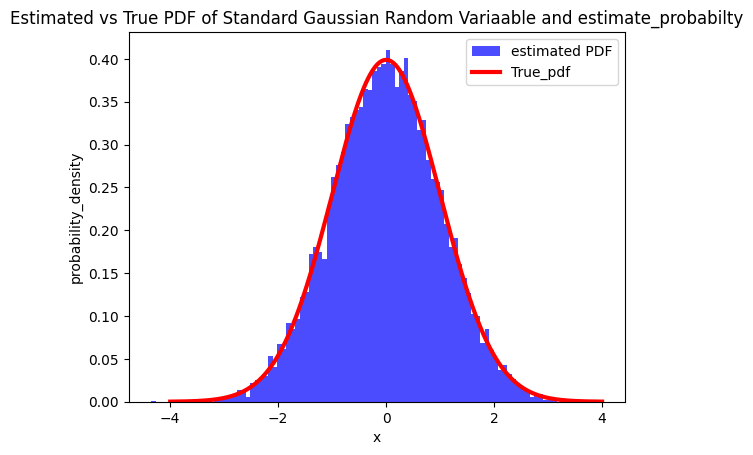

In [2]:
n_sample=10000
x=np.random.normal(0,1,n_sample)
plt.hist(x,bins=100,density=True,alpha=0.7,color='b',label='estimated PDF')
x=np.linspace(-4,4,1000)
true_pdf=norm.pdf(x,0,1)
plt.plot(x,true_pdf,'r',linewidth=3,label='True_pdf')
plt.xlabel('x')
plt.ylabel('probability_density')
plt.title('Estimated vs True PDF of Standard Gaussian Random Variaable and estimate_probabilty')
plt.legend()
plt.show()



b) Repeat (a) for a Gaussian random variable $Y$ with $mean=3$ and $variance=4$.

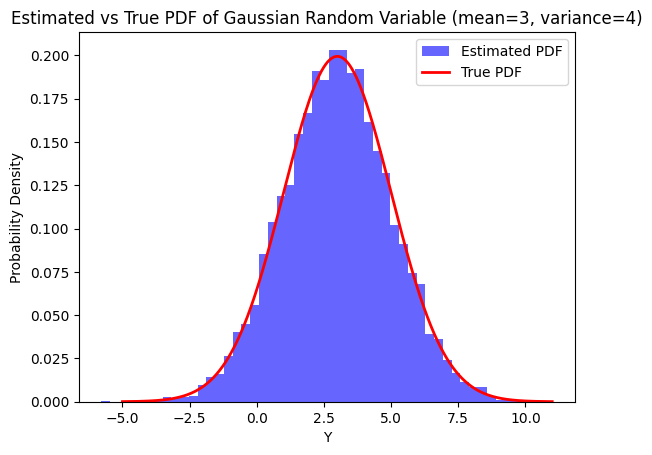

Sample Mean: 2.9813
Sample Variance: 4.0205


In [3]:


# Number of samples
n_samples = 10000

# Generate Gaussian random variable Y with mean 3 and standard deviation 2
mean_y = 3
std_dev_y = 2
Y = np.random.normal(mean_y, std_dev_y, n_samples)

# Plot histogram to estimate the PDF of Y
plt.hist(Y, bins=50, density=True, alpha=0.6, color='b', label='Estimated PDF')

# Compute the true analytical PDF of Y
x = np.linspace(mean_y - 4*std_dev_y, mean_y + 4*std_dev_y, 1000)
true_pdf_y = norm.pdf(x, mean_y, std_dev_y)

# Plot the true PDF on top of the histogram
plt.plot(x, true_pdf_y, 'r', linewidth=2, label='True PDF')

# Add labels and legend
plt.xlabel('Y')
plt.ylabel('Probability Density')
plt.title('Estimated vs True PDF of Gaussian Random Variable (mean=3, variance=4)')
plt.legend()

# Show the plot
plt.show()

# Calculate the sample mean and sample variance
sample_mean_y = np.mean(Y)
sample_variance_y = np.var(Y)

# Print the sample mean and sample variance
print(f"Sample Mean: {sample_mean_y:.4f}")
print(f"Sample Variance: {sample_variance_y:.4f}")


C) Repeat (a) for an exponential random variable with $\lambda = 1$ using the numpy function [numpy.random.exponential](https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html)

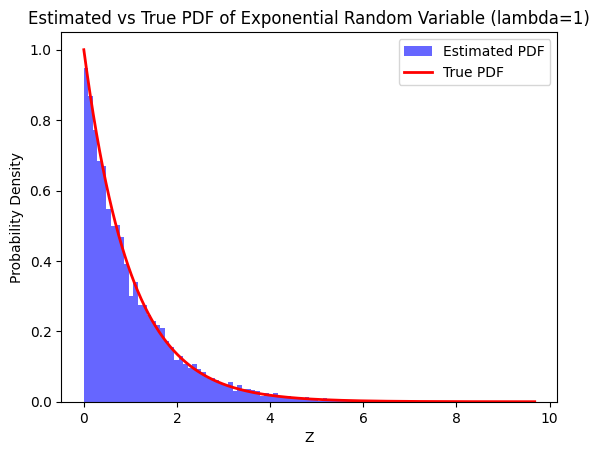

Sample Mean: 1.0243
Sample Variance: 1.0450


In [4]:

from scipy.stats import expon

# Number of samples
n_samples = 10000

# Generate exponential random variable Z with lambda = 1
lambda_z = 1
Z = np.random.exponential(1 / lambda_z, n_samples)

# Plot histogram to estimate the PDF of Z
plt.hist(Z, bins=100, density=True, alpha=0.6, color='b', label='Estimated PDF')

# Compute the true analytical PDF of Z
x = np.linspace(0, np.max(Z), 1000)
true_pdf_z = expon.pdf(x, scale=1 / lambda_z)

# Plot the true PDF on top of the histogram
plt.plot(x, true_pdf_z, 'r', linewidth=2, label='True PDF')

# Add labels and legend
plt.xlabel('Z')
plt.ylabel('Probability Density')
plt.title('Estimated vs True PDF of Exponential Random Variable (lambda=1)')
plt.legend()  # This adds the legend to the plot

# Show the plot
plt.show()

# Calculate the sample mean and sample variance
sample_mean_z = np.mean(Z)
sample_variance_z = np.var(Z)

# Print the sample mean and sample variance
print(f"Sample Mean: {sample_mean_z:.4f}")
print(f"Sample Variance: {sample_variance_z:.4f}")


d) Repeat (a) for an exponential random variable with $\lambda = 0.5$

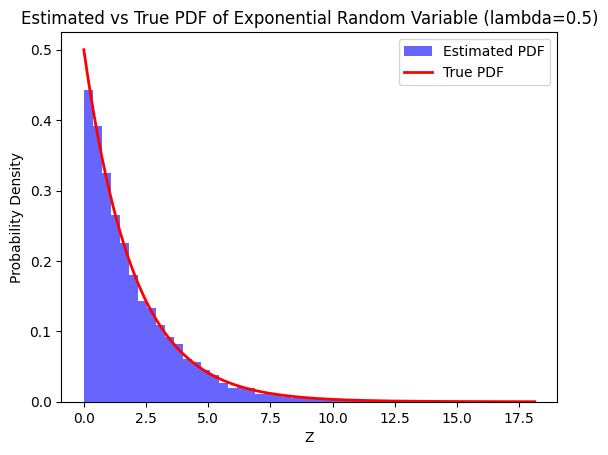

Sample Mean: 1.9895
Sample Variance: 3.9057


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Number of samples
n_samples = 10000

# Generate exponential random variable Z with lambda = 0.5
lambda_z = 0.5
Z = np.random.exponential(1 / lambda_z, n_samples)

# Plot histogram to estimate the PDF of Z
plt.hist(Z, bins=50, density=True, alpha=0.6, color='b', label='Estimated PDF')

# Compute the true analytical PDF of Z
x = np.linspace(0, np.max(Z), 1000)
true_pdf_z = expon.pdf(x, scale=1 / lambda_z)

# Plot the true PDF on top of the histogram
plt.plot(x, true_pdf_z, 'r', linewidth=2, label='True PDF')

# Add labels and legend
plt.xlabel('Z')
plt.ylabel('Probability Density')
plt.title('Estimated vs True PDF of Exponential Random Variable (lambda=0.5)')
plt.legend()  # This adds the legend to the plot

# Show the plot
plt.show()

# Calculate the sample mean and sample variance
sample_mean_z = np.mean(Z)
sample_variance_z = np.var(Z)

# Print the sample mean and sample variance
print(f"Sample Mean: {sample_mean_z:.4f}")
print(f"Sample Variance: {sample_variance_z:.4f}")



# Problem 2: Practicing the Central Limit Theorem
Use Python to simulate the Central Limit Theorem for the following random i.i.d variables and check that the higher the number of number the variables, the more the mean of subsets behave like a gaussian random variable.

a) Exponential random variable with $\lambda = 0.5$

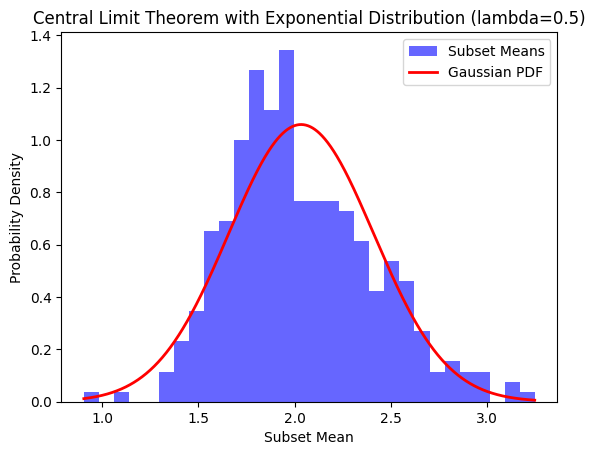

Sample Mean of Subset Means: 2.0342
Sample Variance of Subset Means: 0.1420


In [6]:


# Parameters
lambda_z = 0.5  # rate parameter for the exponential distribution
n_samples = 10000  # total number of samples
subset_size = 30  # size of each subset
n_subsets = n_samples // subset_size  # number of subsets

# Generate exponential random variables
Z = np.random.exponential(1 / lambda_z, n_samples)

# Compute means of subsets
subset_means = [np.mean(Z[i*subset_size:(i+1)*subset_size]) for i in range(n_subsets)]

# Plot histogram of subset means
plt.hist(subset_means, bins=30, density=True, alpha=0.6, color='b', label='Subset Means')

# Compute theoretical Gaussian distribution
mean_subset = np.mean(subset_means)
std_dev_subset = np.std(subset_means)
x = np.linspace(min(subset_means), max(subset_means), 1000)
theoretical_pdf = norm.pdf(x, mean_subset, std_dev_subset)

# Plot theoretical Gaussian PDF
plt.plot(x, theoretical_pdf, 'r', linewidth=2, label='Gaussian PDF')

# Add labels and legend
plt.xlabel('Subset Mean')
plt.ylabel('Probability Density')
plt.title('Central Limit Theorem with Exponential Distribution (lambda=0.5)')
plt.legend()  # This adds the legend to the plot

# Show the plot
plt.show()

# Calculate the sample mean and sample variance of the subset means
sample_mean_means = np.mean(subset_means)
sample_variance_means = np.var(subset_means)

# Print the sample mean and sample variance of the subset means
print(f"Sample Mean of Subset Means: {sample_mean_means:.4f}")
print(f"Sample Variance of Subset Means: {sample_variance_means:.4f}")




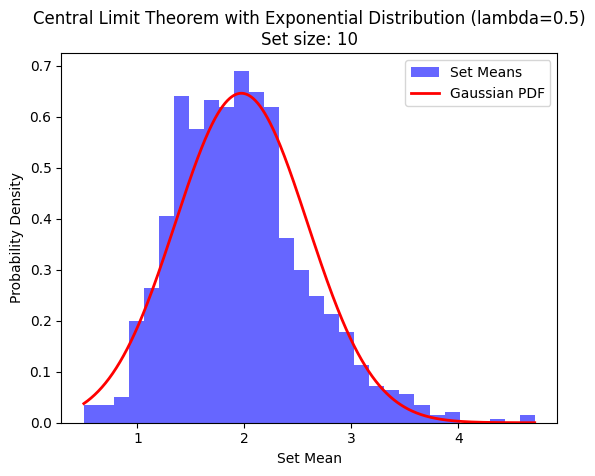

Sample Mean of Set Means: 1.9714
Sample Variance of Set Means: 0.3812


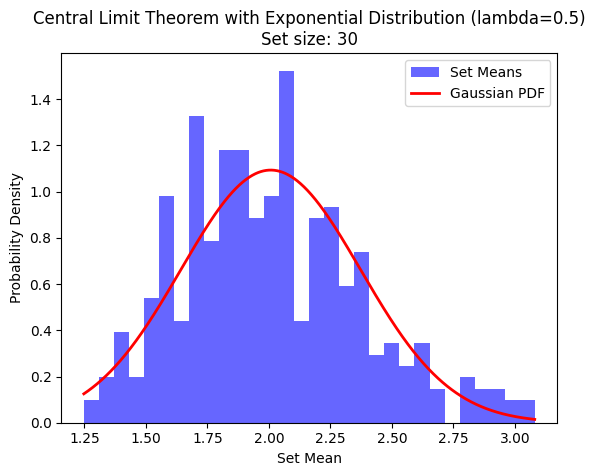

Sample Mean of Set Means: 2.0076
Sample Variance of Set Means: 0.1332


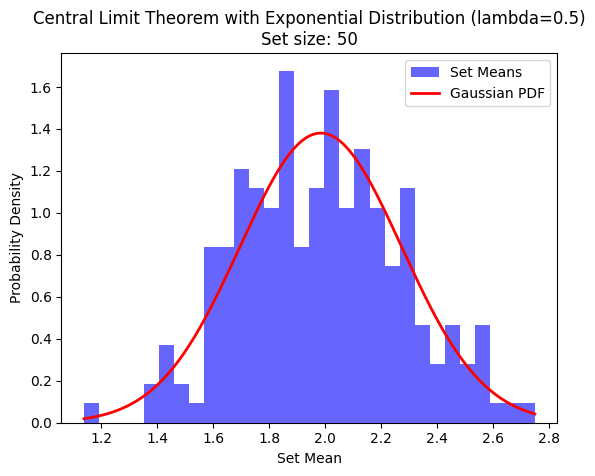

Sample Mean of Set Means: 1.9844
Sample Variance of Set Means: 0.0835


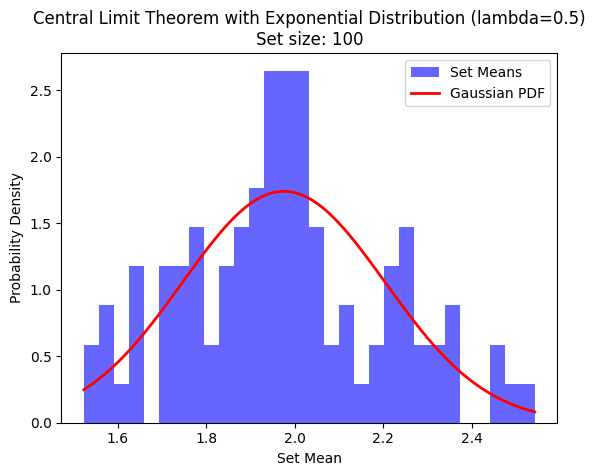

Sample Mean of Set Means: 1.9752
Sample Variance of Set Means: 0.0526


In [7]:


def simulate_clt(lambda_z, n_samples, set_size):
    # Generate exponential random variables
    Z = np.random.exponential(1 / lambda_z, n_samples)

    # Compute means of sets
    n_sets = n_samples // set_size
    set_means = [np.mean(Z[i*set_size:(i+1)*set_size]) for i in range(n_sets)]

    # Plot histogram of set means
    plt.hist(set_means, bins=30, density=True, alpha=0.6, color='b', label='Set Means')

    # Compute theoretical Gaussian distribution
    mean_set = np.mean(set_means)
    std_dev_set = np.std(set_means)
    x = np.linspace(min(set_means), max(set_means), 1000)
    theoretical_pdf = norm.pdf(x, mean_set, std_dev_set)

    # Plot theoretical Gaussian PDF
    plt.plot(x, theoretical_pdf, 'r', linewidth=2, label='Gaussian PDF')

    # Add labels and legend
    plt.xlabel('Set Mean')
    plt.ylabel('Probability Density')
    plt.title(f'Central Limit Theorem with Exponential Distribution (lambda={lambda_z})\nSet size: {set_size}')
    plt.legend()  # This adds the legend to the plot

    # Show the plot
    plt.show()

    # Calculate the sample mean and sample variance of the set means
    sample_mean_means = np.mean(set_means)
    sample_variance_means = np.var(set_means)

    # Print the sample mean and sample variance of the set means
    print(f"Sample Mean of Set Means: {sample_mean_means:.4f}")
    print(f"Sample Variance of Set Means: {sample_variance_means:.4f}")

# Parameters
lambda_z = 0.5  # rate parameter for the exponential distribution
n_samples = 10000  # total number of samples

# Simulate CLT for different set sizes
simulate_clt(lambda_z, n_samples, set_size=10)
simulate_clt(lambda_z, n_samples, set_size=30)
simulate_clt(lambda_z, n_samples, set_size=50)
simulate_clt(lambda_z, n_samples, set_size=100)



b) Binomial random variable with $n = 20$ and $p = 0.2$

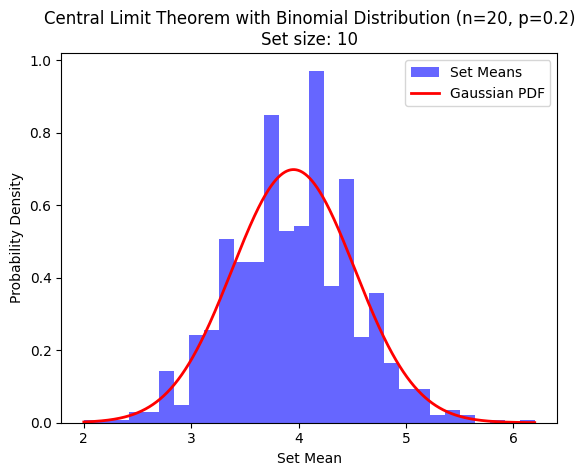

Sample Mean of Set Means: 3.9531
Sample Variance of Set Means: 0.3261


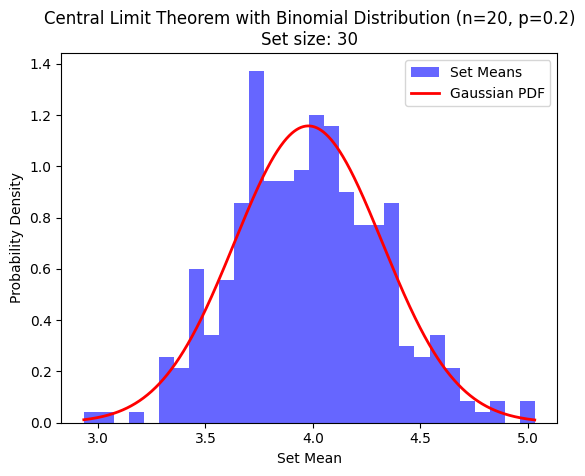

Sample Mean of Set Means: 3.9791
Sample Variance of Set Means: 0.1188


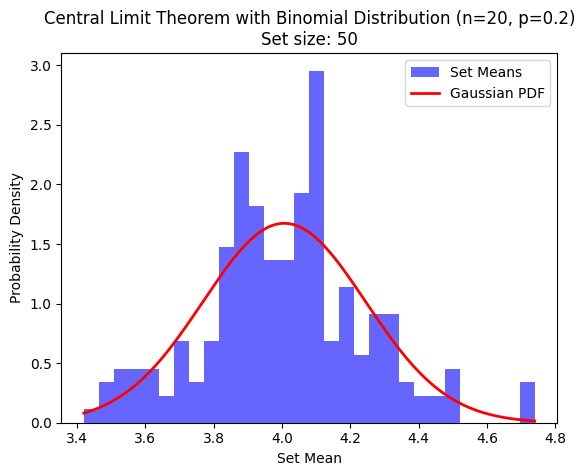

Sample Mean of Set Means: 4.0068
Sample Variance of Set Means: 0.0568


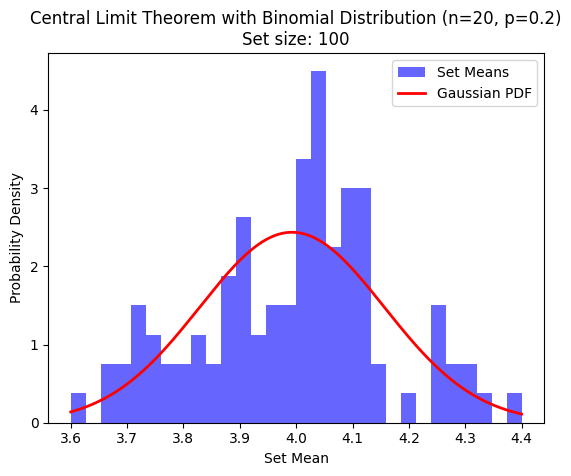

Sample Mean of Set Means: 3.9926
Sample Variance of Set Means: 0.0268


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def simulate_clt_binomial(n, p, n_samples, set_size):
    # Generate binomial random variables
    binomial_samples = np.random.binomial(n, p, n_samples)

    # Compute means of sets
    n_sets = n_samples // set_size
    set_means = [np.mean(binomial_samples[i*set_size:(i+1)*set_size]) for i in range(n_sets)]

    # Plot histogram of set means
    plt.hist(set_means, bins=30, density=True, alpha=0.6, color='b', label='Set Means')

    # Compute theoretical Gaussian distribution
    mean_set = np.mean(set_means)
    std_dev_set = np.std(set_means)
    x = np.linspace(min(set_means), max(set_means), 1000)
    theoretical_pdf = norm.pdf(x, mean_set, std_dev_set)

    # Plot theoretical Gaussian PDF
    plt.plot(x, theoretical_pdf, 'r', linewidth=2, label='Gaussian PDF')

    # Add labels and legend
    plt.xlabel('Set Mean')
    plt.ylabel('Probability Density')
    plt.title(f'Central Limit Theorem with Binomial Distribution (n={n}, p={p})\nSet size: {set_size}')
    plt.legend()  # This adds the legend to the plot

    # Show the plot
    plt.show()

    # Calculate the sample mean and sample variance of the set means
    sample_mean_means = np.mean(set_means)
    sample_variance_means = np.var(set_means)

    # Print the sample mean and sample variance of the set means
    print(f"Sample Mean of Set Means: {sample_mean_means:.4f}")
    print(f"Sample Variance of Set Means: {sample_variance_means:.4f}")

# Parameters
n = 20  # number of trials
p = 0.2  # probability of success
n_samples = 10000  # total number of samples

# Simulate CLT for different set sizes
simulate_clt_binomial(n, p, n_samples, set_size=10)
simulate_clt_binomial(n, p, n_samples, set_size=30)
simulate_clt_binomial(n, p, n_samples, set_size=50)
simulate_clt_binomial(n, p, n_samples, set_size=100)



c) Uniform random variable with $a = 2$ and $b = 8$

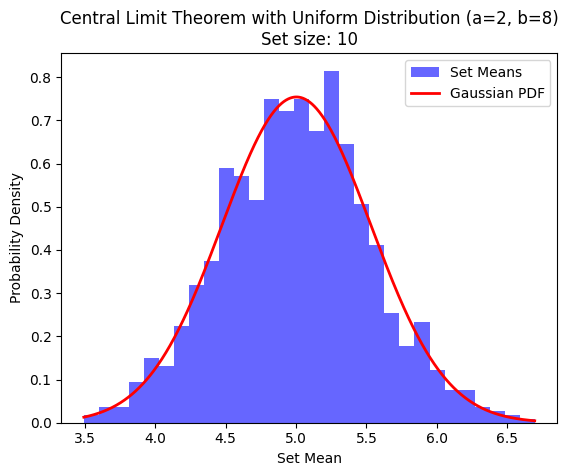

Sample Mean of Set Means: 5.0028
Sample Variance of Set Means: 0.2799


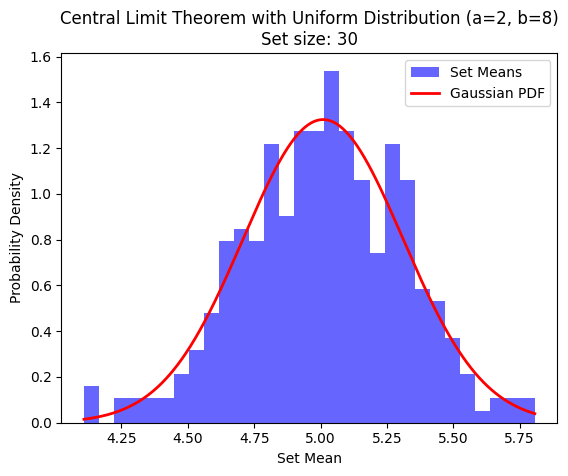

Sample Mean of Set Means: 5.0095
Sample Variance of Set Means: 0.0907


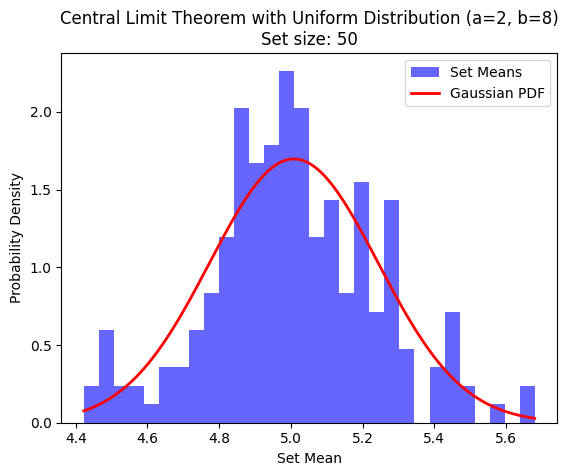

Sample Mean of Set Means: 5.0083
Sample Variance of Set Means: 0.0552


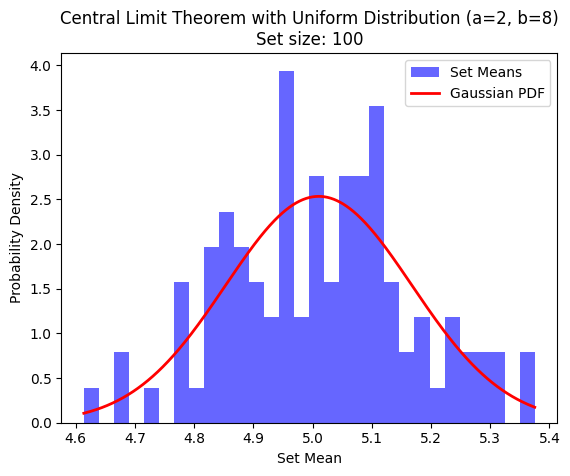

Sample Mean of Set Means: 5.0105
Sample Variance of Set Means: 0.0248


In [10]:


def simulate_clt_uniform(a, b, n_samples, set_size):
    # Generate uniform random variables
    uniform_samples = np.random.uniform(a, b, n_samples)

    # Compute means of sets
    n_sets = n_samples // set_size
    set_means = [np.mean(uniform_samples[i*set_size:(i+1)*set_size]) for i in range(n_sets)]

    # Plot histogram of set means
    plt.hist(set_means, bins=30, density=True, alpha=0.6, color='b', label='Set Means')

    # Compute theoretical Gaussian distribution
    mean_set = np.mean(set_means)
    std_dev_set = np.std(set_means)
    x = np.linspace(min(set_means), max(set_means), 1000)
    theoretical_pdf = norm.pdf(x, mean_set, std_dev_set)

    # Plot theoretical Gaussian PDF
    plt.plot(x, theoretical_pdf, 'r', linewidth=2, label='Gaussian PDF')

    # Add labels and legend
    plt.xlabel('Set Mean')
    plt.ylabel('Probability Density')
    plt.title(f'Central Limit Theorem with Uniform Distribution (a={a}, b={b})\nSet size: {set_size}')
    plt.legend()  # This adds the legend to the plot

    # Show the plot
    plt.show()

    # Calculate the sample mean and sample variance of the set means
    sample_mean_means = np.mean(set_means)
    sample_variance_means = np.var(set_means)

    # Print the sample mean and sample variance of the set means
    print(f"Sample Mean of Set Means: {sample_mean_means:.4f}")
    print(f"Sample Variance of Set Means: {sample_variance_means:.4f}")

# Parameters
a = 2  # lower bound of uniform distribution
b = 8  # upper bound of uniform distribution
n_samples = 10000  # total number of samples

# Simulate CLT for different set sizes
simulate_clt_uniform(a, b, n_samples, set_size=10)
simulate_clt_uniform(a, b, n_samples, set_size=30)
simulate_clt_uniform(a, b, n_samples, set_size=50)
simulate_clt_uniform(a, b, n_samples, set_size=100)
